In [9]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/Performing_Experiments_in_Python/datasets/'
import pandas as pd
import numpy as np
import plotnine as p9
from scipy import stats


In [2]:
athletes = pd.read_csv(path_data+'olyathswim.csv')
athletes.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
0,27,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
1,28,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
2,30,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
3,36,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
4,37,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN


/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 345 rows containing non-finite values.


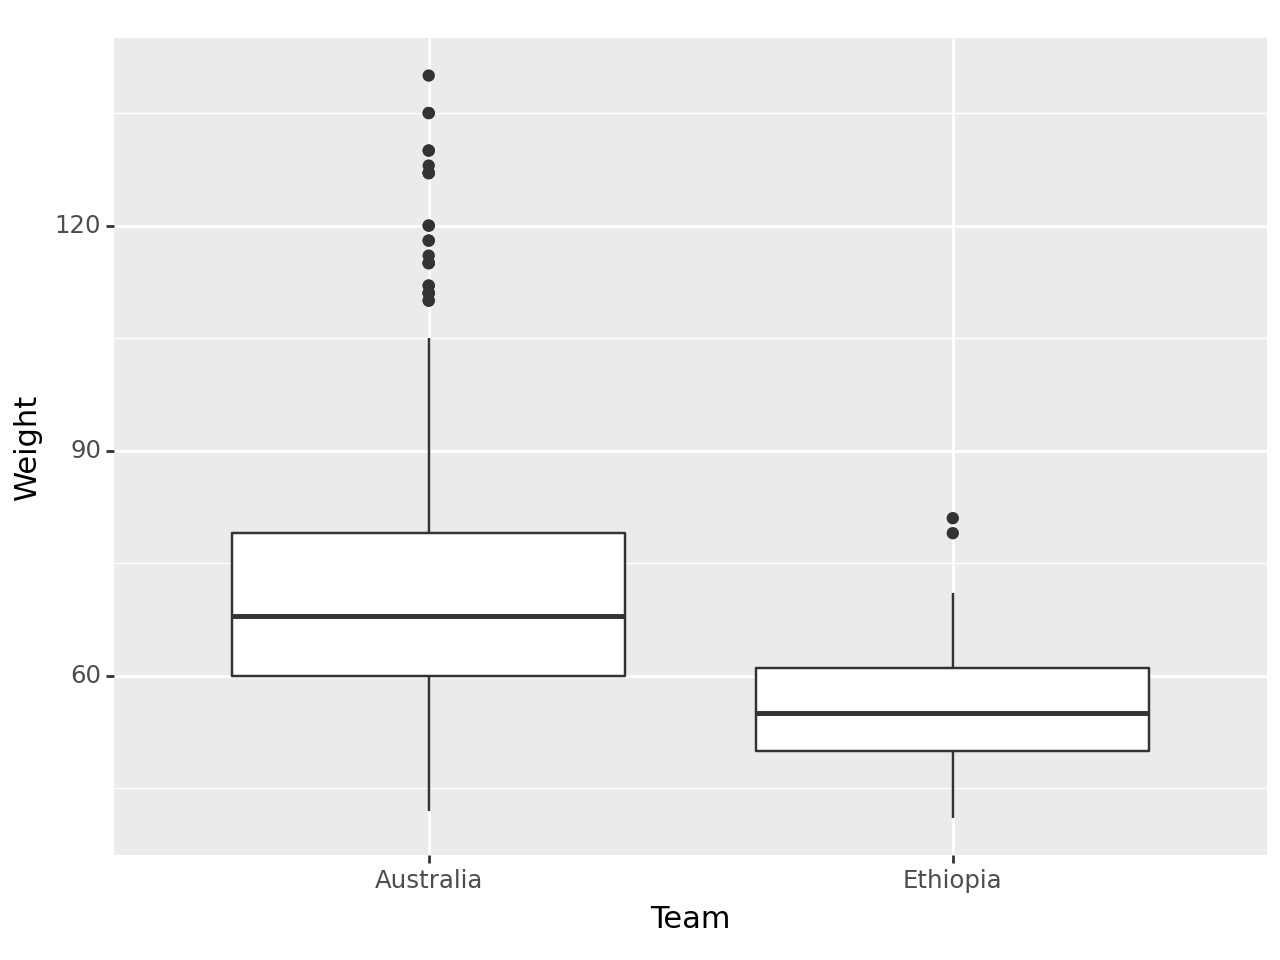

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 345 rows containing non-finite values.


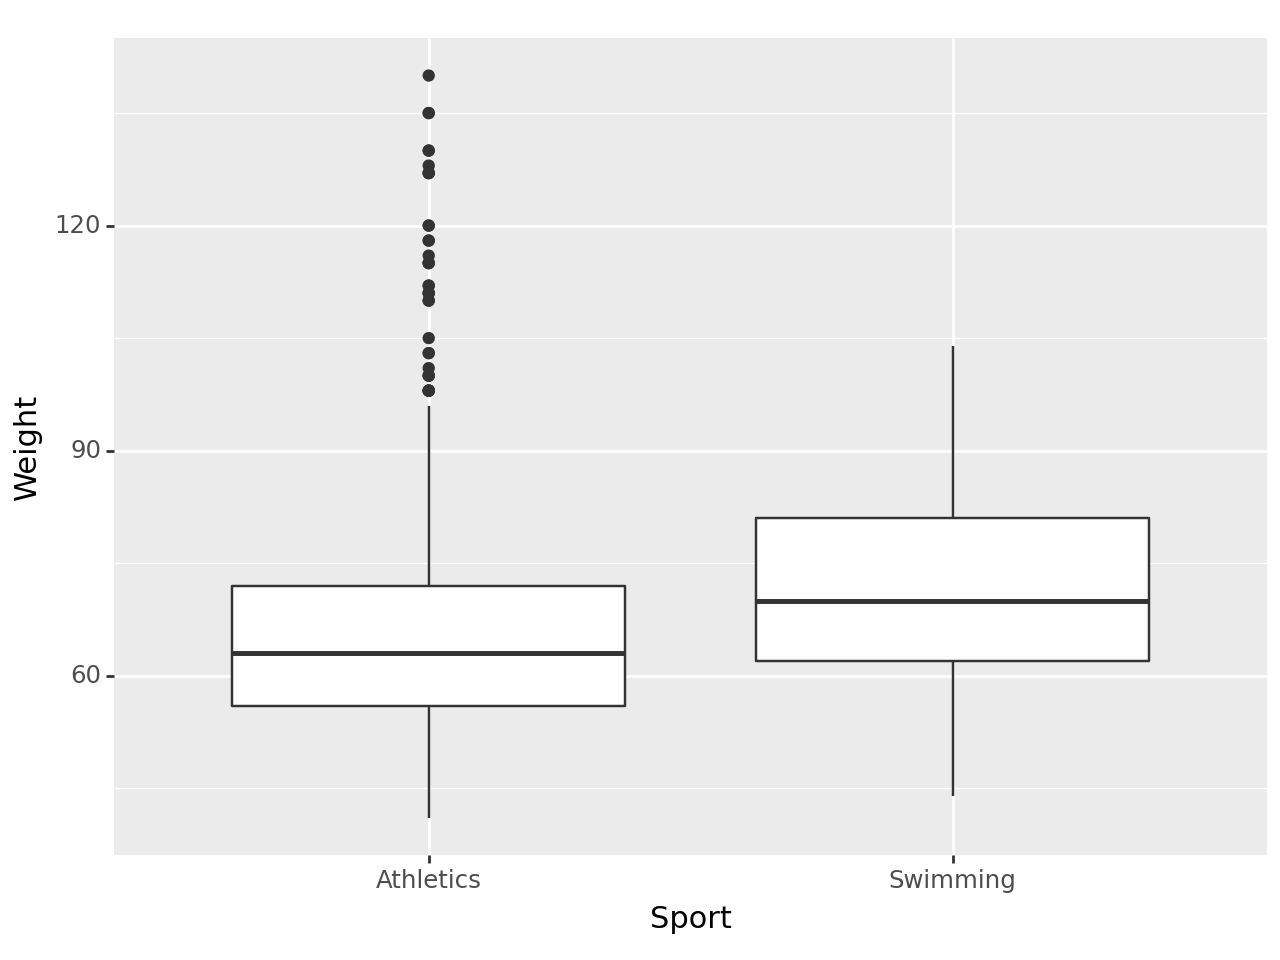


Sport      Athletics  Swimming
Team                          
Australia        993      1235
Ethiopia         289         4


"\nCorrect! Confounding variables can be tricky to root out. We're going to need better methods to answer such questions.\n"

In [10]:
# exercise 01

"""
Exploring confounding variables

In this exercise, you're going to do some exploratory data analysis (EDA) to better understand confounding variables. Once again, we'll be looking at trends in weights of Olympic athletes from the athletes DataFrame. We are interested in possible differences between the weights of athletes from different countries, which may be more difficult to determine than it seems.

Are apparent differences between countries due to real differences between the countries, or might they be caused by something else within the data? Exploratory data analysis will help! The athletes DataFrame contains details about Olympic athletes from Ethiopia and Kenya. pandas and plotnine have been loaded into the workspace as pd and p9.
"""

# Instructions

"""

    Using the athletes DataFrame, create and save a boxplot of Weight in relation to country Team, with those variables on the y and x axes, respectively.
---

    Look for a possible confounding variable by creating a boxplot of Weight in relation to Sport, with those variables on the y and x axes, respectively.
---

    Print the two plots created previously.
    Examine whether the differences between Teams may be driven by different proportions of athletes from different Sports by doing a crosstabulation of Team and Sport and printing it.
---
Question

Which of the following interpretations best fits the available data?
(Both Sport and Team may affect Weight, but this effect may be driven by different proportions of athletes from different disciplines in the two team's)
"""

# solution

# Create boxplot of Team versus Weight
plotTeamVWeight = p9.ggplot(athletes[(athletes['Team'] == 'Australia') | (athletes['Team'] == 'Ethiopia')])+ p9.aes('Team','Weight')+ p9.geom_boxplot()

# Create boxplot of Sport versus Weight
plotSportVWeight = p9.ggplot(athletes[(athletes['Team'] == 'Australia') | (athletes['Team'] == 'Ethiopia')])+ p9.aes('Sport','Weight')+ p9.geom_boxplot()
      
# Print plots 
print(plotTeamVWeight, plotSportVWeight)

# Create crosstabulation & print table
table = pd.crosstab(athletes[(athletes['Team'] == 'Australia') | (athletes['Team'] == 'Ethiopia')].Team, athletes[(athletes['Team'] == 'Australia') | (athletes['Team'] == 'Ethiopia')].Sport)
print(table)

#----------------------------------#

# Conclusion

"""
Correct! Confounding variables can be tricky to root out. We're going to need better methods to answer such questions.
"""

In [29]:
euasdata = pd.read_csv(path_data+'euasdata_ch2.csv')
display(euasdata.head())

,Unnamed: 0,Country,GDP_per_cap,Life_exp,Unemployment,Continent
0,0,Afghanistan,623.2,63.5,8.6,Asia
1,1,Albania,3984.2,79.9,15.8,Europe
2,9,Armenia,3489.1,77.0,16.6,Asia
3,12,Austria,44117.7,83.5,6.2,Europe
4,13,Azerbaijan,5438.7,74.6,5.2,Asia


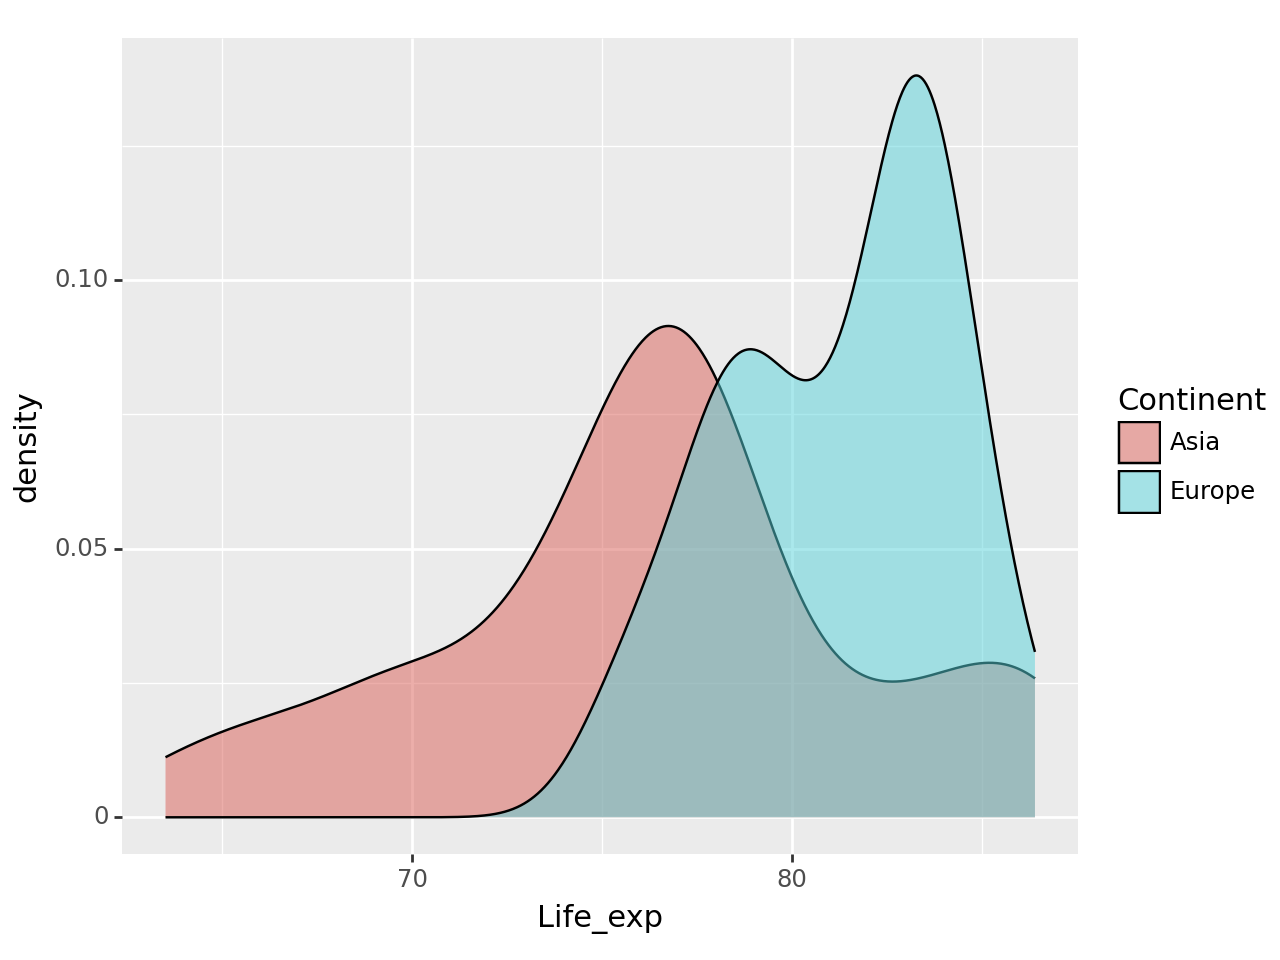

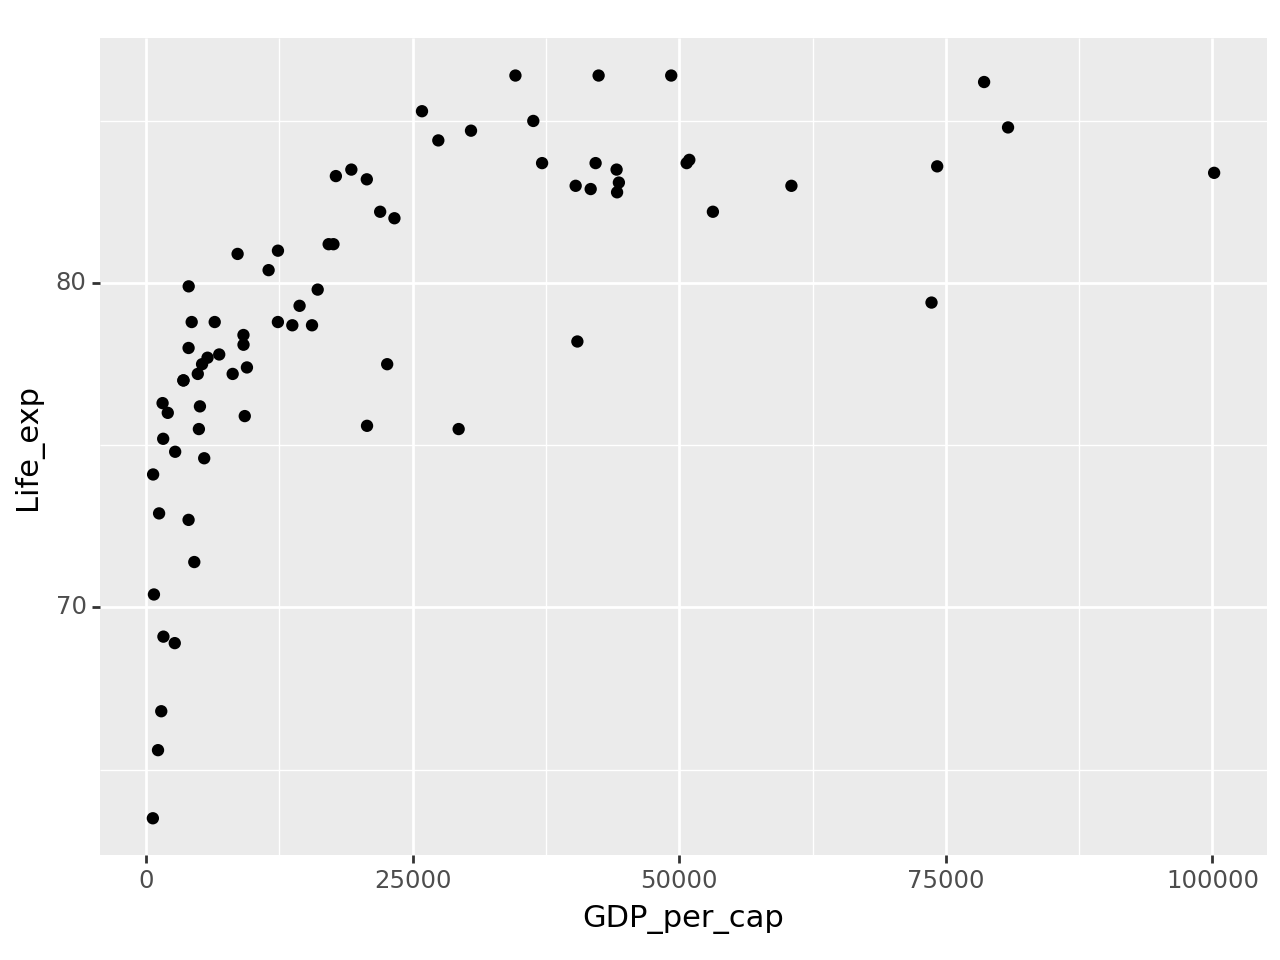

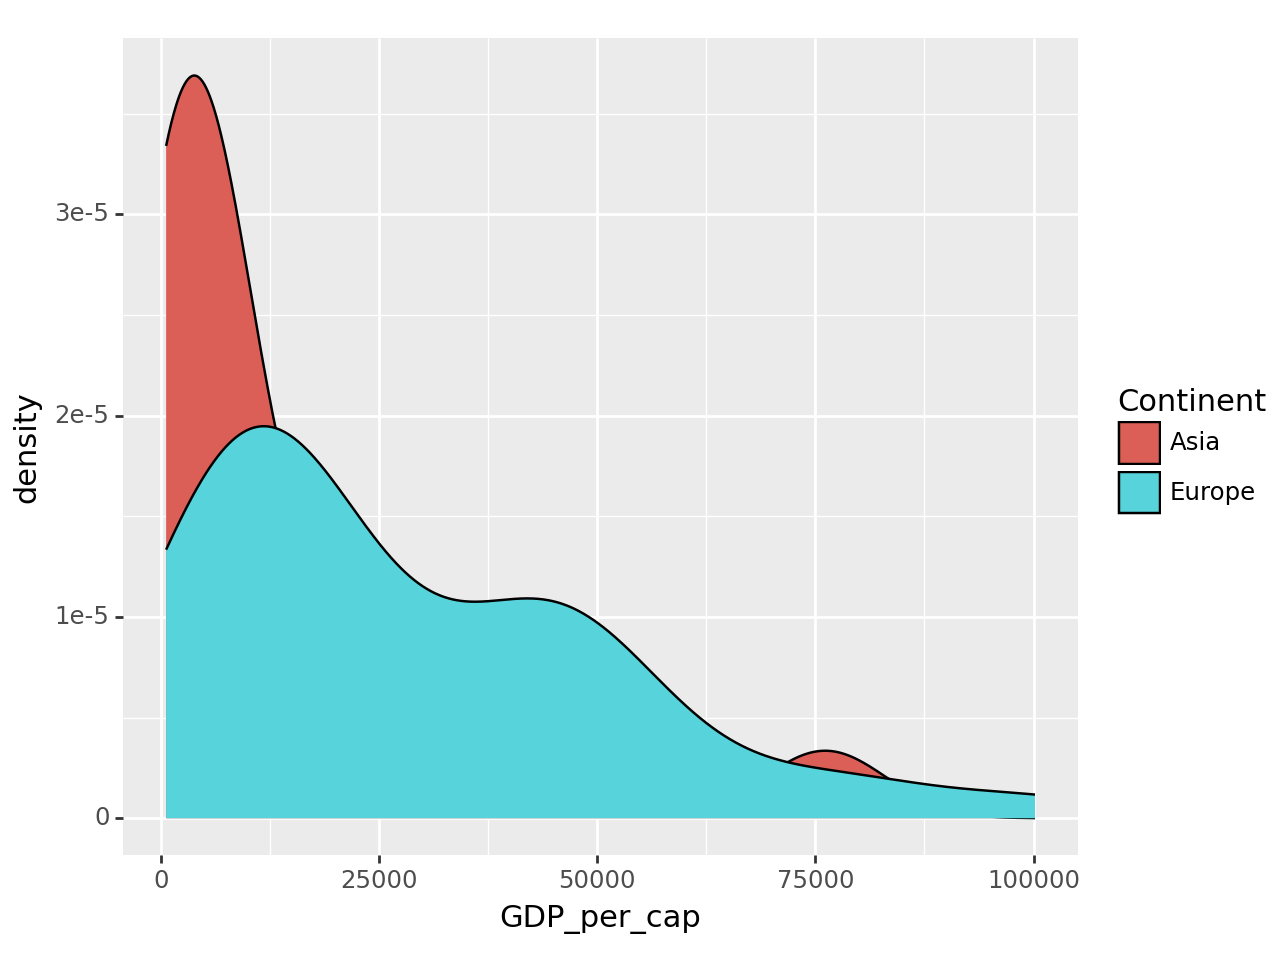

'\nCorrect! GDP per capita both correlates with life expectancy and differs between the continents.\n'

In [30]:
# exercise 02

"""
Finding confounding variables

We're going to explore the topic of confounding a little more. Returning to our UN demographic data, we'll again be looking to make a comparison between countries in Asia and Europe. Here we're interested in comparing Asian and European life expectancy, using a DataFrame provided as euasdata. For each Country, you have three figures available: their GDP per capita in USD (GDP_per_cap), their female life expectancy (Life_exp) and their unemployment rate (Unemployment). Which of these factors may be confounding? You'll need to create some plots in order to explore these issues. pandas and plotnine have been loaded into the workspace as pd and p9.
"""

# Instructions

"""

    Create and save a density plot of life expectancy, comparing continents via fill color.
---

    Create and save a scatter plot of GDP_per_cap in relation to Life_exp.
---

    Create a density plot of GDP, comparing continents via fill color.
    Print all three plots.
---
Question

You may notice some interesting trends in relation to how GDP_per_cap relates to Life_exp and possible differences in GDP between the continents. What does that tell you? Do you see similar patterns in Unemployment if you create similar plots for that variable?

Which variable(s) give the strongest indications that they may be confounding?
(GDP per cap)
"""

# solution

# Life expectancy density plot
plotLifeVCont = p9.ggplot(euasdata) + p9.aes(x='Life_exp', fill='Continent') +p9.geom_density(alpha=0.5)

# GDP vs life expectancy scatter plot
plotGDPVLife = p9.ggplot(euasdata) + p9.aes(x='GDP_per_cap', y='Life_exp') +p9.geom_point()

# GDP density plot
plotGDPVCont = p9.ggplot(euasdata) + p9.aes(x='GDP_per_cap', fill='Continent') +p9.geom_density()

# Print plots
print(plotLifeVCont,plotGDPVLife,plotGDPVCont)

#----------------------------------#

# Conclusion

"""
Correct! GDP per capita both correlates with life expectancy and differs between the continents.
"""

In [34]:
athletes.dropna(inplace=True)

In [35]:
# exercise 03

"""
Random sampling

In this exercise, we're going to look at random sampling. You have been provided with a large dataset (athletes) containing the details of a large number of American athletes. For the purposes of this exercise, we are interested in differences between the body Weight of competitors in swimming and athletics. In order to test this, you'll be using a two-sample t-test. However, you will be performing this test on a random sample of the data. By playing with the random subset chosen, you'll see how randomness affects the results. You will need to extract a random subset of athletes from each event in order to run your test. pandas, scipy.stats, plotnine, and random have been loaded into the workspace as pd, stats, p9, and ran, respectively.
"""

# Instructions

"""

    Set seed to 0000.
    Create two subset DataFrames (subsetathl and subsetswim) from athletes, with 30 random samples in each.
    Perform a two-sample t-test on the Weight column of each subset DataFrame, save it to t_result, then print it.
---

    Change the seed value to 2397 and re-run the code.

"""

# solution

# Define random seed
seed = 0000

# Create two subsets, one for the athletics competitors and one for the swimmers
subsetathl = athletes[athletes['Sport']=='Athletics'].sample(n=30, random_state= seed)
subsetswim = athletes[athletes['Sport']=='Swimming'].sample(n=30, random_state= seed)

# Perform the two-sample t-test
t_result = stats.ttest_ind(subsetathl.Weight, subsetswim.Weight)
print(t_result)

#----------------------------------#

# Define random seed
seed = 2397

# Create subsets
subsetathl = athletes[athletes.Sport == "Athletics"].sample(n=30, random_state= seed)
subsetswim = athletes[athletes.Sport == "Swimming"].sample(n=30, random_state= seed)

# Perform the two-sample t-test
t_result = stats.ttest_ind(subsetathl.Weight, subsetswim.Weight) 
print(t_result)

#----------------------------------#

# Conclusion

"""
Good work. Now you are familiar with randomizing samples and you can see how choosing different random samples can give you different results. Did you notice that your p-value changed when a different random sample was chosen? Improving your approach to create a balanced dataset would help avoid this problem.
"""

Ttest_indResult(statistic=-2.6222206968830553, pvalue=0.011140286327084779)
Ttest_indResult(statistic=-1.1224246955251662, pvalue=0.26630698336527897)


'\nGood work. Now you are familiar with randomizing samples and you can see how choosing different random samples can give you different results. Did you notice that your p-value changed when a different random sample was chosen? Improving your approach to create a balanced dataset would help avoid this problem.\n'

In [50]:
# exercise 04

"""
Blocking

We're going to have another look at the same data but, this time, we'll use blocking to improve our approach. Like last time, you'll be using a two-sample t-test on athlete Weight within your DataFrame, athletes. This time, however, you will control for Sex as a blocking factor, sampling equally from male and female participants. You will need to extract a random subset of athletes from both events to run your test. pandas, scipy.stats, plotnine, and random have been loaded into the workspace as pd, stats, p9, and ran, respectively.
"""

# Instructions

"""

    Create four subset DataFrames from athletes, with 15 randomly chosen samples in each, corresponding to each of the four possible combinations of Sex and Sport.
    Concatenate the two Athletics blocks and the two Swimming blocks to create two DataFrames to compare, each containing 30 samples.
    Perform a two-sample t-test, comparing Weight between sports and print the output.

"""

# solution

seed = 9000

# Create subset blocks
subsetathlm = athletes[(athletes.Sport == "Athletics") & (athletes.Sex =="M")].sample(n=105, random_state= seed)
subsetathlf = athletes[(athletes.Sport == "Athletics") & (athletes.Sex =="F")].sample(n=105, random_state= seed)
subsetswimm = athletes[(athletes.Sport == "Swimming") & (athletes.Sex =="M")].sample(n=105, random_state= seed)
subsetswimf = athletes[(athletes.Sport == "Swimming") & (athletes.Sex =="F")].sample(n=105, random_state= seed)

# Combine blocks
subsetathl = pd.concat([subsetathlm,subsetathlf])
subsetswim = pd.concat([subsetswimm,subsetswimf])

# Perform the two-sample t-test
print(stats.ttest_ind(subsetathl.Weight, subsetswim.Weight))

#----------------------------------#

# Conclusion

"""
Very good. Your t-test is significant, with a p-value under 0.05. This blocked design has resolved the issue you had in the last exercise. You can see how this type of blocking approach can be a useful way to improve your experimental design when a confounding variable is present.
"""

Ttest_indResult(statistic=-3.4849890345970316, pvalue=0.0005441982712667847)


'\nVery good. Your t-test is significant, with a p-value under 0.05. This blocked design has resolved the issue you had in the last exercise. You can see how this type of blocking approach can be a useful way to improve your experimental design when a confounding variable is present.\n'

In [52]:
podataframe=pd.read_csv(path_data+'podataframe.csv')
podataframe

,Field,Yield2018,Yield2019
0,A,60.2,63.2
1,B,12.0,15.6
2,C,13.8,14.8
3,D,91.8,96.7
4,E,50.0,53.0
5,F,45.0,47.0
6,G,32.0,31.3
7,H,87.5,89.8
8,I,60.1,67.8
9,J,88.0,90.0


In [53]:
# exercise 05

"""
Paired t-test

Think back to the potato field example that we dealt with previously. Here, you've been provided with a small DataFrame (podataframe) containing information on 10 Fields. We are interested in potato yield in tons/hectare. For each Field, we have a value for its Yield2018, before the application of a new fertilizer, and its Yield2019, after the application of the new fertilizer. You'll need to perform two t-tests, a standard two-sample test, and a paired t-test. A paired t-test will control for the variation between fields. Do the two tests give the same result? scipy.stats is loaded as stats.
"""

# Instructions

"""
Do a standard two-sample t-test, comparing 2018 and 2019 potato yield, save the result to ttestind and print it.
---
Perform a paired t-test, comparing potato yield from 2018 and 2019, saving the result to ttestpair and printing it.
"""

# solution

# Perform independent t-test
ttestind = stats.ttest_ind(podataframe['Yield2018'], podataframe['Yield2019'])
print(ttestind)

#----------------------------------#

# Perform paired t-test
ttestpair = stats.ttest_rel(podataframe['Yield2018'], podataframe['Yield2019'])
print(ttestpair)

#----------------------------------#

# Conclusion

"""
Good work. Recall, the paired test is more sensitive than the independent test and can pick up a difference that the independent test can't detect. This is because the difference within the samples each year (individual field effect) is quite large in comparison to the difference between the two years (effect of treatment). Paired tests are useful when a large variability exists.
"""

Ttest_indResult(statistic=-0.21660326792826629, pvalue=0.8309534738562026)
TtestResult(statistic=-4.024223770175694, pvalue=0.002998929369297433, df=9)


"\nGood work. Recall, the paired test is more sensitive than the independent test and can pick up a difference that the independent test can't detect. This is because the difference within the samples each year (individual field effect) is quite large in comparison to the difference between the two years (effect of treatment). Paired tests are useful when a large variability exists.\n"

In [54]:
# exercise 06

"""
One-way ANOVA

Let's have another look at some data from our Olympic dataset. How does the Weight of athletes vary between teams from different countries? In this exercise, you're going to use a one-way ANOVA to check for the presence of significant variation in Weight of Olympic athletes. You have been provided with the athletes DataFrame, containing details about male athletes from the Team of the United States, France, and China. Here is a set of boxplots of Weight for the athletes from those three countries.

Density plot of the body weights of Olympic athletes from three competing countries

A one-way ANOVA will allow you to see whether any differences between these groups of values are significant. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9, respectively.
"""

# Instructions

"""

    Create three arrays, France_athletes, US_athletes, and China_athletes, for the athletes' Weights from each country.
    Using f_oneway(), perform a one-way ANOVA on the arrays, save the result as anova, and print it.

"""

# solution

# Create arrays
France_athletes = athletes[athletes.Team == 'France'].Weight
US_athletes = athletes[athletes.Team == 'United States'].Weight
China_athletes = athletes[athletes.Team == 'China'].Weight

# Perform one-way ANOVA
anova = stats.f_oneway(France_athletes, US_athletes, China_athletes)
print(anova)

#----------------------------------#

# Conclusion

"""
Good work! According to this test, significant differences exist between the weights of athletes for each country.
"""

F_onewayResult(statistic=10.654818758550501, pvalue=2.4849426119023038e-05)


'\nGood work! According to this test, significant differences exist between the weights of athletes for each country.\n'

In [61]:
subset_athl = athletes[(athletes.Team == 'China')|(athletes.Team == 'United States')|(athletes.Team == 'France')]


In [62]:
# exercise 07

"""
Two-way ANOVA

Let's have another look at some data from our Olympic dataset. How does the Weight of athletes vary between teams from different countries and of different sexes? In this exercise, you're going to use a two-way ANOVA to check for the presence of significant variation in the Weight of Olympic sprinters. You have been provided with the athletes DataFrame, containing details about athletes from the Team of the United States, and China, from both sexes.

Density plot of athlete weight in relation to sex and country

A two-way ANOVA will allow you to see which of these two factors, Sex and Team, have a significant effect on Weight. pandas, statsmodels, and plotnine have been loaded into the workspace as pd, sm, and p9, respectively.
"""

# Instructions

"""

    Create a model, using the provided formula for Weight as a function of Team and Sex.
    Perform a two-way ANOVA, testing for the effect of both Team and Sex on Weight, and print the ANOVA table.

"""

# solution

import statsmodels as sm

# Create model
formula = 'Weight ~ Sex + Team'
model = sm.api.formula.ols(formula, data=subset_athl).fit()

# Perform ANOVA and print table
aov_table = sm.api.stats.anova_lm(model, typ=2)
print(aov_table)

#----------------------------------#

# Conclusion

"""
Good work! According to the results of your ANOVA, Sex has a significant effect, while Team has no significant effect. ANOVA is a very powerful method, as it allows us to separate out the effects of multiple factors.
"""

                 sum_sq      df            F         PR(>F)
Sex       141264.584862     1.0  1068.706821  7.991472e-191
Team        1456.545344     2.0     5.509590   4.104804e-03
Residual  285779.061551  2162.0          NaN            NaN


'\nGood work! According to the results of your ANOVA, Sex has a significant effect, while Team has no significant effect. ANOVA is a very powerful method, as it allows us to separate out the effects of multiple factors.\n'

In [65]:
# exercise 08

"""
Two-way ANOVA with interactive effects

Once again, you're going to look at our dataset of Olympic athletes. As in previous exercises, you'll be looking at the variation in athlete Weight. You're going to look at athletes of either Sex competing in one of two Events: the 100 meter and 10,000 meter run. Have a look at these data in the boxplots below.

Density plot of athlete weight in relation to sex and event

This dataset is provided in your workspace as athletes. An ANOVA will allow you to work out which of these variables affect Weight and whether an interactive effect is present. pandas, statsmodels, and plotnine have been loaded into the workspace as pd, sm, and p9, respectively.
"""

# Instructions

"""

    Perform a two-way ANOVA to test whether Sex, Event, or the interaction between the two has a significant effect on Weight.
    Using anova_lm() on your model, extract and print the table of results produced by your ANOVA.

"""

# solution

# Run the ANOVA
model = sm.api.formula.ols('Weight ~ Sex + Event + Sex:Event', data = athletes).fit()

# Extract our table
aov_table = sm.api.stats.anova_lm(model, typ=2)

# Print the table
print(aov_table)

#----------------------------------#

# Conclusion

"""
Good work! Can you interpret the AOV table? Look at the p-values for the effects of Sex, Event, and Sex:Event. Using a standard alpha of 0.05, Sex, Event, and Sex:Event have a significant effect on Weight. This means that both factors influence Weight, and the effect of one factor is dependent on the other.
"""

                  sum_sq      df           F  PR(>F)
Sex                  NaN     1.0         NaN     NaN
Event      993831.699315   124.0  140.920488     0.0
Sex:Event  686814.941771   124.0   97.387009     0.0
Residual   341758.421171  6009.0         NaN     NaN


/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/base/model.py:1917: RuntimeWarning: invalid value encountered in divide
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 124, but rank is 80
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 124, but rank is 80


'\nGood work! Can you interpret the AOV table? Look at the p-values for the effects of Sex, Event, and Sex:Event. Using a standard alpha of 0.05, Sex, Event, and Sex:Event have a significant effect on Weight. This means that both factors influence Weight, and the effect of one factor is dependent on the other.\n'

In [67]:
# exercise 09

"""
Choosing an appropriate test

Let's look at another problem from the Olympic dataset, focusing on the Height of the competitors. Here, you've been provided with athletes data on the Norwegian and Colombian Team for each Sex. With those two factors, you'll have four separate groups. First, look at the boxplots below, then choose an appropriate statistical test.

Density plot of athlete height in relation to sex and country

Finally, carry out the test. pandas, statsmodels, and plotnine have been loaded into the workspace as pd, sm, and p9, respectively.
"""

# Instructions

"""
Question

Which statistical test should you use to examine the effect of Sex and Team on Height?
(two-way anova Sex,Team and SEX:TEAM)
---

    Create a formula and model, examining Height as a function of Sex, Team, and their interaction.
    Perform a two-way ANOVA, testing for the effect of Sex, Team, and an interactive effect on Height, and print the ANOVA table.

"""

# solution

# Create model
formula = 'Height ~ Sex + Team + Sex:Team'
model = sm.api.formula.ols(formula, data = athletes).fit()

# Perform ANOVA and print table
aov_table = sm.api.stats.anova_lm(model, typ=2)
print(aov_table)

#----------------------------------#

# Conclusion

"""
Nice. According to the results of your two-way ANOVA, both of the factors, Sex and Team, have a significant effect on Height. However, no significant interactive effect is present.
"""

                 sum_sq      df          F         PR(>F)
Sex                 NaN     1.0        NaN            NaN
Team       95668.204087   105.0  17.672391  1.566507e-171
Sex:Team   14578.259172   105.0   2.692981   1.645490e-16
Residual  307688.894984  5968.0        NaN            NaN


/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/base/model.py:1917: RuntimeWarning: invalid value encountered in divide
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 105, but rank is 62
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 105, but rank is 97


'\nNice. According to the results of your two-way ANOVA, both of the factors, Sex and Team, have a significant effect on Height. However, no significant interactive effect is present.\n'

In [ ]:
# The data provided in the course pages is diferent from the one used in the lessons